## Q4

In possian process, events are independent. SO the timing od spike is only determined by rate which is 0.01 spikes per millisecond. So the spiking probability at 10 ms are the same, which is 1%. The occurance of previous spike at 7ms will not affect the probabilities at 10ms or 11ms.

## Q5

In [ ]:
## Bernoulli Process
# The method that I used in last week's code

# In the limit where the time bins are very small (which we assume with 1ms bins) 
# The probability of more than one spike occurring in a bin is negligible
# The Bernoulli process approaches a Poisson process. 
# This is because the occurrences of spikes are independent from one time bin to another, 
# similar to the independence property in a Poisson process. 
# The firing rate of the Bernoulli process also matches the rate parameter (lambda) of the equivalent Poisson process.

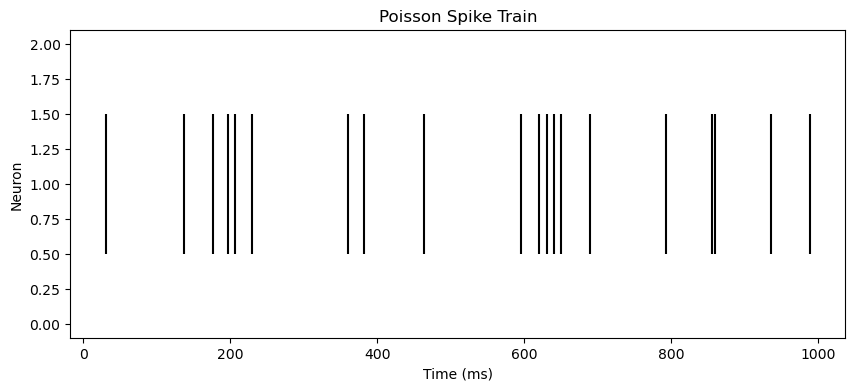

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Time parameters
total_time_sec = 1   # total time in seconds
bin_size_ms = 1      # bin size in milliseconds
total_bins = int(total_time_sec * 1000 / bin_size_ms)  # total number of bins

# Spike train parameters
mean_rate_hz = 20    # mean firing rate in Hz
prob_spike = mean_rate_hz / 1000  # probability of a spike in each bin

# # Generate the spike train using uniform distribution
# spike_train = np.random.rand(total_bins) < prob_spike  # Boolean array: True where there's a spike, False otherwise

# Generate the spike train using binomial distribution
spike_train = (np.random.binomial(1, prob_spike, total_bins)).astype(bool)

# Generate corresponding time array
time = np.arange(total_bins) * bin_size_ms  # Time array in milliseconds. 1- target value

# Plot the spike train
plt.figure(figsize=(10, 4))
plt.eventplot(time[spike_train], color='black')  # Only plot the times where there was a spike
plt.xlabel('Time (ms)')
plt.ylabel('Neuron')
plt.title('Poisson Spike Train')
plt.show()

In [105]:
a = np.random.binomial(1, 0.2, 200)
b = (np.random.rand(200) < 0.2).astype(int)
print(((np.where(a == 1))[0]).size)
print(((np.where(b == 1))[0]).size)

33
34


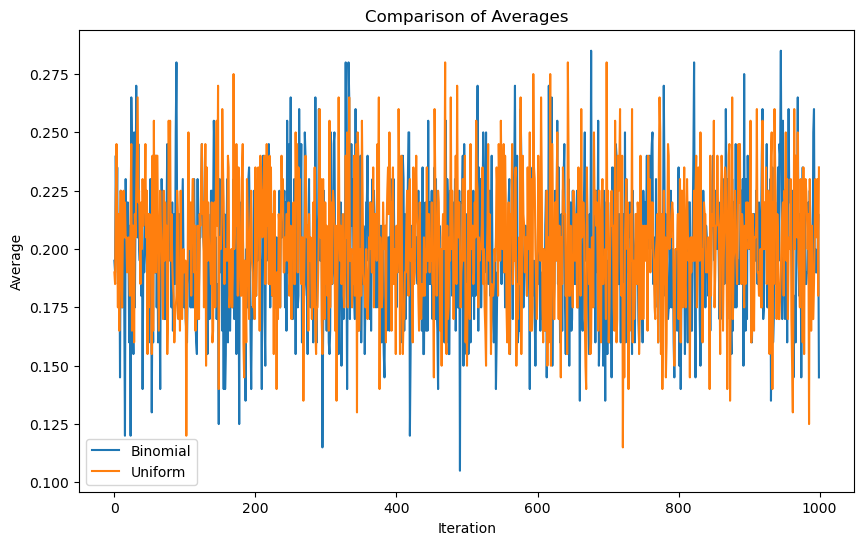

In [134]:
import numpy as np
import matplotlib.pyplot as plt


# set random generated parameters
n = 200
p = 0.2

binomial_results = []
uniform_results = []

# Iterate 1000 times and append results
for _ in range(1000):
    
    a = np.random.binomial(1, p, n)
    b = (np.random.rand(n) < p).astype(int)
    
    binomial_results.append(a)
    uniform_results.append(b)
    
# change list as numpy array
binomial_results = np.array(binomial_results)
uniform_results = np.array(uniform_results)


# create line graph
plt.figure(figsize=(10, 6))
plt.plot(np.mean(binomial_results, axis = 1), label='Binomial')
plt.plot(np.mean(uniform_results, axis = 1), label='Uniform')
plt.title('Comparison of Averages')
plt.xlabel('Iteration')
plt.ylabel('Average')
plt.legend()
plt.show()

In [135]:


# calculate mean and sdv
binomial_mean = np.mean(binomial_results)
uniform_mean = np.mean(uniform_results)
binomial_std = np.std(binomial_results)
uniform_std = np.std(uniform_results)

# calculate coefficient
corr_coeff = np.corrcoef(binomial_results.flatten(), uniform_results.flatten())[0, 1]

# print the result
print(f'Binomial Mean: {binomial_mean:.4f}, Standard Deviation: {binomial_std:.4f}')
print(f'Uniform Mean: {uniform_mean:.4f}, Standard Deviation: {uniform_std:.4f}')
print(f'Correlation Coefficient: {corr_coeff:.4f}')

Binomial Mean: 0.1986, Standard Deviation: 0.3989
Uniform Mean: 0.2020, Standard Deviation: 0.4015
Correlation Coefficient: -0.0003


## Q6

In [142]:
# Number of presentations
num_presentations = 1000

# # Generate the spike trains for multiple presentations
# spike_trains = np.random.rand(num_presentations, total_bins) < prob_spike  # Boolean array: True where there's a spike, False otherwise

# Generate the spike trains using binomial distribution
spike_trains = np.random.binomial(1, spike_prob, (num_presentations, n_bins))

# Calculate the number of spikes in each presentation
num_spikes = np.sum(spike_trains, axis=1)

# Calculate spike counts through time
spike_counts = np.sum(spike_trains, axis=0)

In [143]:
spike_trains.shape

(1000, 1000)

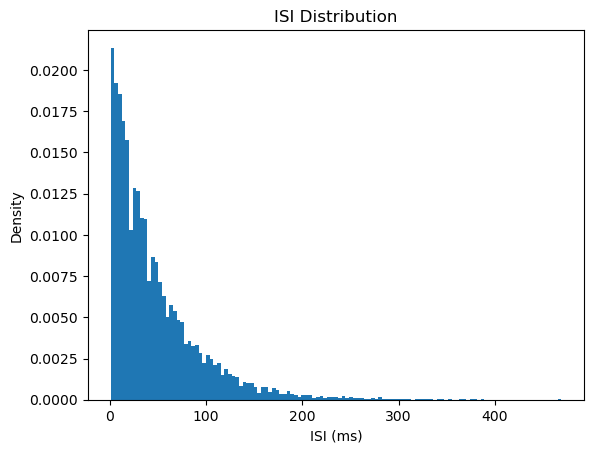

In [147]:
# Suppose spike_trains is your 1000x1000 binary array
# spike_trains = np.random.choice([0, 1], size=(1000, 1000))

ISIs = []

# Iterate over trials
for trial in range(spike_trains.shape[1]):
    # Get the spike times for this trial
    spike_times = np.where(spike_trains[:, trial] == 1)[0]
    
    if len(spike_times) > 1:
        # Calculate the differences between consecutive spike times
        trial_ISIs = np.diff(spike_times)

        # Append these ISIs to the overall list
        ISIs.extend(trial_ISIs)

# Convert the list to a numpy array for easier manipulation
ISIs = np.array(ISIs)

# Plot the histogram of ISIs
plt.hist(ISIs, bins='auto', density=True)
plt.xlabel('ISI (ms)')
plt.ylabel('Density')
plt.title('ISI Distribution')
plt.show()

## Q7

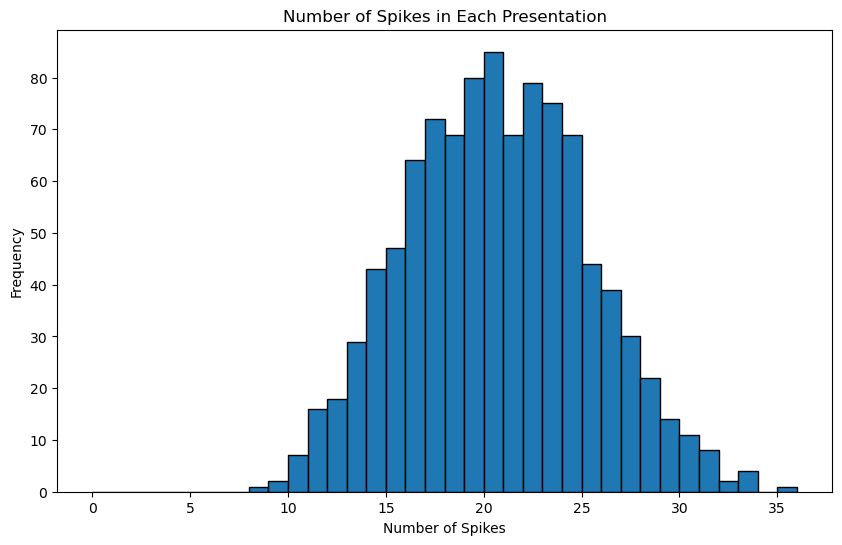

In [146]:
num_spikes = np.sum(spike_trains, axis=1)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(num_spikes, bins=np.arange(0, np.max(num_spikes) + 2), edgecolor='black')
plt.xlabel('Number of Spikes')
plt.ylabel('Frequency')
plt.title('Number of Spikes in Each Presentation')
plt.show()

## Q8

In [145]:
import numpy as np

# Calculate the mean and variance of spike counts
mean_spikes = np.mean(num_spikes)
var_spikes = np.var(num_spikes)

# Calculate the Fano Factor
fano_factor = var_spikes / mean_spikes

print("Mean number of spikes:", mean_spikes)
print("Variance of spike counts:", var_spikes)
print("Fano Factor:", fano_factor)


Mean number of spikes: 20.205
Variance of spike counts: 21.600975000000002
Fano Factor: 1.069090571640683
